In [2]:
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Embedding, Dense, Activation, Input
import matplotlib.pyplot as plt
import sys

import gzip
import random
from keras import backend as K
from sklearn import manifold
from sklearn.svm import LinearSVC
import math
from itertools import combinations 
from itertools import permutations
from importlib import reload

sys.path.append('/Users/anastasia/Desktop/randtensor')
import utils as u
import randtensor as r
reload(u)
reload(r)

import matplotlib.patches as mpatches



Using TensorFlow backend.


In [3]:
layer2_output_new = np.load('/Users/anastasia/Desktop/randtensor/layer2_output_new.npy')
layer2_output_new

array([[ 0.89973319, -0.14529204, -0.95196486, ...,  0.98251206,
         0.37476751, -0.93517894],
       [ 0.16819678,  0.88103116, -0.67720902, ...,  0.96937758,
        -0.2104273 , -0.89978373],
       [-0.36366636,  0.97968054, -0.97624409, ...,  0.99843174,
         0.54216582, -0.95929128],
       ...,
       [-0.40860453,  0.99371076, -0.06168729, ...,  0.99977058,
         0.10749613,  0.97852969],
       [ 0.9978081 ,  0.99933988,  0.86663491, ...,  0.91657752,
         0.34766459,  0.99450713],
       [ 0.94902116,  0.99371582,  0.90352488, ...,  0.79715025,
        -0.16359007,  0.97902107]])

In [72]:
#get a T,N,C tensor
T = 5420
C = 8
N = 100

data = np.reshape(layer2_output_new, (T,C,N), order = 'F') 

data = np.swapaxes(data,1,2)

data.shape
#shape is now (T,N,C)

(5420, 100, 8)

In [ ]:
def dichotomies():
    dichotomies = []
    digits = [1,2,3,4,5,6,7,8]
    first_digit = 1

    comb = combinations(digits, 4) 
        
    for d in comb:
        d_list = list(d)
        d_list2 = []
        for num in digits:
            if num not in d_list:
                d_list2.append(num)

    
        dichotomies.append((d_list, d_list2))

    dichotomies = dichotomies[0:35]
    
    return dichotomies

In [16]:
sample_PS = [0.8155197367907533,
 0.2911488608388485,
 0.042337700980586604,
 0.25866847738861487,
 0.2185858569929186,
 0.18133826044502843,
 0.25695117021202635,
 0.15419344318226733,
 0.2801088178013249,
 0.020789876218579317,
 0.16616774369843312,
 0.0387535836986386,
 -0.05513578357927601,
 0.1849320788835903,
 0.06630903867936702,
 0.31325267540170526,
 0.11523857650921393,
 0.2901939149051781,
 0.16650978364317118,
 0.17335881270538778,
 0.7776222936931968,
 0.1192242225355698,
 0.08597267749369213,
 -0.23434542021300966,
 0.14329271902421015,
 0.03339767137400538,
 0.0575850992186856,
 -0.0781439997172836,
 -0.008954827263013884,
 0.17765084358201388,
 -0.017015283274885874,
 0.2565214681040018,
 0.10849310805036842,
 0.25784746466696057,
 0.12427982263871637]

In [17]:
sample_CCGP = [0.9993427121771218,
 0.552559963099631,
 0.5658383302583025,
 0.57776176199262,
 0.6142988929889299,
 0.40814690959409594,
 0.5797912822878228,
 0.5598650830258303,
 0.5410055350553505,
 0.22020295202952028,
 0.41806388376383763,
 0.1684905442804428,
 0.2722036439114391,
 0.6002594557195572,
 0.2221517527675277,
 0.5732529981549815,
 0.46316881918819186,
 0.5655788745387453,
 0.547636070110701,
 0.5806964944649446,
 0.9996309963099631,
 0.6198224169741697,
 0.4731665129151292,
 0.5968980627306273,
 0.5584640221402214,
 0.25309040590405907,
 0.5114448800738007,
 0.21053390221402216,
 0.26733740774907755,
 0.5625461254612547,
 0.25630189114391144,
 0.5613180350553506,
 0.565492389298893,
 0.5356088560885609,
 0.4980166051660516]

In [49]:
surrogate_labels = np.ones(43360)

index = 0
for a in range(1,9):
    for b in range(0,5420):
        surrogate_labels[index] = a
        index+=1

In [41]:
def dotproduct(v1, v2):
      return sum((a*b) for a, b in zip(v1, v2))

def length(v):
      return math.sqrt(dotproduct(v, v))

def cosine(v1, v2):
      return dotproduct(v1, v2) / (length(v1) * length(v2))
  

In [69]:
def p_score(data, dichotomy = ([1,2,3,4], [5,6,7,8]), labels = train_labels2_new):
    


    plane_cosine = []


    label1b = dichotomy[1][0]
    label2b = dichotomy[1][1]
    label3b = dichotomy[1][2]
    label4b = dichotomy[1][3]

   
    
    for perm in permutations(dichotomy[0]):   
            
        label1a = perm[0]
        target1 = []
        data1 = []
    
        label2a = perm[1]
        target2 = []
        data2 = []
            
            
        label3a = perm[2]
        target3 = []
        data3 = []
    
    
        label4a = perm[3]
        target4 = []
        data4 = []
    
    
    
    
        for lab in range(len(labels)):
            if int(labels[lab]) == label1a: 
                
                target1.append(0)
        
                data1.append(data[lab])
            
            if int(labels[lab]) == label1b: 
                
                target1.append(1)
        
                data1.append(data[lab])
            
            
            if int(labels[lab]) == label2a: 
                
                target2.append(0)
        
                data2.append(data[lab])
            
            
            if int(labels[lab]) == label2b: 
                
                target2.append(1)
        
                data2.append(data[lab])
            
            
            if int(labels[lab]) == label3a: 
                
                target3.append(0)
        
                data3.append(data[lab])
            
            
            if int(labels[lab]) == label3b: 
                
                target3.append(1)
        
                data3.append(data[lab])
            
            
            if int(labels[lab]) == label4a: 
                
                target4.append(0)
        
                data4.append(data[lab])
            
            
            if int(labels[lab]) == label4b: 
                
                target4.append(1)
        
                data4.append(data[lab])

            
            
    
        target1 = np.array(target1)
        target2 = np.array(target2)
        target3 = np.array(target3)
        target4 = np.array(target4)
    
        data1 = np.array(data1)
        data2 = np.array(data2)
        data3 = np.array(data3)
        data4 = np.array(data4)

            
    
        svc1 = LinearSVC(C=1.0, max_iter = 50000)

        svc1.fit(data1, target1.T)

        vector1 = svc1.coef_[0]
    
    
        svc2 = LinearSVC(C=1.0, max_iter = 50000)
    
        svc2.fit(data2, target2.T)

        vector2 = svc2.coef_[0]
            
            
            
        svc3 = LinearSVC(C=1.0, max_iter = 50000)

        svc3.fit(data3, target3.T)

        vector3 = svc3.coef_[0]
    
    
        svc4 = LinearSVC(C=1.0, max_iter = 50000)
    
        svc4.fit(data4, target4.T)

        vector4 = svc4.coef_[0]
            
            
            #loop for finding 6 cosines
    
        avg_cosine = 0
        
        avg_cosine += cosine(vector1, vector2)/6
            
        avg_cosine += cosine(vector1, vector3)/6
            
        avg_cosine += cosine(vector1, vector4)/6
            
        avg_cosine += cosine(vector2, vector3)/6
            
        avg_cosine += cosine(vector2, vector4)/6
            
        avg_cosine += cosine(vector3, vector4)/6
            
        plane_cosine.append(avg_cosine)  
            
    
    plane_cosine.sort(reverse = True)
    
    return plane_cosine[0]
    
    

In [77]:
def ccgp(data, dichotomy = ([1,2,3,4], [5,6,7,8]), labels = train_labels2_new):
    labels1 = dichotomy
    label_1a = dichotomy[0]
    label_1b = dichotomy[1]
    
    accuracy = []
    
    label_1a_combs = combinations(label_1a, 3)
    label_1b_combs = combinations(label_1b, 3)
    
    
    label_1a_set = []
    label_1b_set = []
    
    
    for a in label_1a_combs:
        
        label_1a_set.append(a)
        
        
    for b in label_1b_combs:
        
        label_1b_set.append(b)
    
    
    for train_a in label_1a_set:
        
        for train_b in label_1b_set:
 
            
            label_2a = labels1[0] #dichotomy a
            label_2b = labels1[1] #dichotomy b
            
            target1 = []
            target2 = []
    
            data_train = []

            data_test = []
            
            for lab in range(len(labels)):
                if int(labels[lab]) in label_2a: #[1,2,3,4]
                
                    if int(labels[lab]) in train_a: #[1,2,3]
                
                        target1.append(0)
                        
                        data_train.append(data[lab])
                
                    else:
                        target2.append(0) #[4]
                        
                        data_test.append(data[lab])
                    
        
                else: #[5,6,7,8]

                    if int(labels[lab]) in train_b:
                
                        target1.append(1)
                        data_train.append(data[lab])
                
                    else:
                        target2.append(1)
            
                        data_test.append(data[lab])
            
    
            target1 = np.array(target1)
            target2 = np.array(target2)
    
            data_train = np.array(data_train)
            data_test = np.array(data_test)

            
            #fit on training data
            svc1 = LinearSVC(C=1.0, max_iter = 50000)

            svc1.fit(data_train, target1.T)
             
            #test on testing data
            acc = svc1.score(data_test, target2.T)
            accuracy.append(acc)

    
    return np.mean(accuracy)         
    
    

NameError: name 'new_dataset' is not defined

In [66]:
train_labels2_new = np.ones(43360)


index = 0
for a in range(1,9):
    for b in range(0,5420):
        train_labels2_new[index] = a
        index+=1
        
        
        

In [27]:
new_dataset = np.ones((43360, 100))
new_labels = np.ones(43360)

counter = 0
for i in range(0,5420):
    start = i
    
    for j in range(0,8):
        
        new_dataset[counter] = layer2_output_new[start + j*5420]
        new_labels[counter] = train_labels2_new[start + j*5420]
        
        counter += 1
    


    
    
    

In [29]:
colors_new = np.ones(len(new_labels), dtype=object)
index = 0
for label in new_labels:
    lab = int(label)
    if lab == 1 or lab == 3:
        color = 'firebrick'
    if lab == 2 or lab == 4:
        color = 'lightskyblue'
    if lab == 5 or lab == 7:
        color = 'lightcoral'
    if lab == 6 or lab == 8:
        color = 'darkblue'
    colors_new[index] = color
    index+= 1


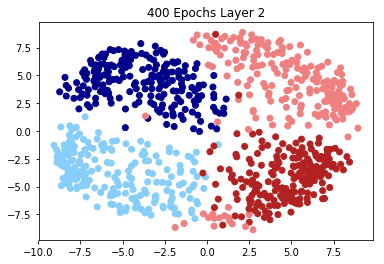

In [30]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors_new[:800])
plt.title("400 Epochs Layer 2")
plt.show()

In [24]:
#get a T,N,C tensor
T = 5420
C = 8
N = 100

data = np.reshape(layer2_output_new, (T,C,N), order = 'F') 

data = np.swapaxes(data,1,2)

print(data.shape)


#shape is (T,N,C)

(5420, 100, 8)


In [71]:
data

array([[[ 0.31237518, -0.27916397,  0.22696887, ..., -0.63271956,
          0.15574273,  0.29761282],
        [-0.63400333,  0.57803728, -0.63790605, ..., -0.43447636,
          0.36033889,  0.25538528],
        [-0.07157055,  0.30136189, -0.20556023, ...,  0.27242783,
         -0.1833386 ,  0.0109878 ],
        ...,
        [-0.13391118,  0.57668127,  0.03833653, ...,  0.41244938,
         -0.17670317, -0.1405333 ],
        [ 0.27887726,  0.03563535, -0.94387761, ...,  0.15017964,
         -0.4041249 ,  0.3684161 ],
        [-0.20005496,  0.24749387, -0.13822506, ...,  0.14410766,
          0.18931857,  0.16204974]],

       [[-0.03603089, -0.32941803, -0.33272106, ...,  0.17600763,
          0.53252889, -0.98811956],
        [ 0.14221602, -0.67104409,  0.44422292, ...,  0.61292254,
         -0.00704494, -0.35587593],
        [ 0.21195124,  0.4496758 ,  0.25980438, ...,  0.18912606,
         -1.06010868,  0.21872067],
        ...,
        [-0.08205825, -0.17901631,  0.13350955, ...,  

In [74]:
mean = u.first_moment(data)

In [86]:
mean[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 1.38777878e-17,  0.00000000e+00,  2.77555756e-17,
         1.38777878e-17,  2.77555756e-17,  0.00000000e+00,
         2.77555756e-17,  1.21430643e-17],
       [ 0.00000000e+00,  0.00000000e+00, -1.21430643e-17,
        -6.93889390e-18,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.38777878e-17],
       [ 2.08166817e-17,  1.38777878e-17,  1.38777878e-17,
         0.00000000e+00,  2.77555756e-17,  0.00000000e+00,
         2.77555756e-17,  1.38777878e-17],
       [-1.04083409e-17,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-3.46944695e-18,  0.000000

In [88]:
#mean_reshaped = np.reshape(layer2_output_new, ((T*C),N), order = 'F') 
mean_reshaped = np.reshape(layer2_output_new, ((T*C),N)) 

In [90]:
new_dataset_mean = np.ones((43360, 100))
new_labels_mean = np.ones(43360)

counter = 0
for i in range(0,5420):
    start = i
    
    for j in range(0,8):
        
        new_dataset_mean[counter] = mean_reshaped[start + j*5420]
        new_labels_mean[counter] = train_labels2_new[start + j*5420]
        
        counter += 1
    


    
 

In [91]:
colors_new = np.ones(len(new_labels_mean), dtype=object)
index = 0
for label in new_labels_mean:
    lab = int(label)
    if lab == 1 or lab == 3:
        color = 'firebrick'
    if lab == 2 or lab == 4:
        color = 'lightskyblue'
    if lab == 5 or lab == 7:
        color = 'lightcoral'
    if lab == 6 or lab == 8:
        color = 'darkblue'
    colors_new[index] = color
    index+= 1


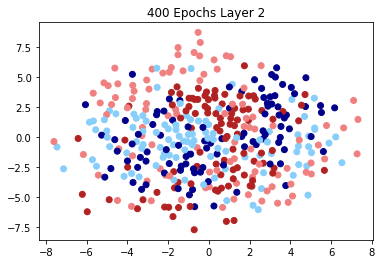

In [92]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset_mean[:400])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors_new[:400])
plt.title("400 Epochs Layer 2")
plt.show()

In [7]:
mean_C = np.ones((T, N))
mean_T = np.ones((C, N))
mean_N = np.ones((T, C))

In [9]:
#mean center

X = data

for t_value in range(T):
    
    for n_value in range(N):
        
        current_mean = np.mean(data[t_value,n_value,:])
        mean_C[t_value, n_value] = current_mean
        
        for c_value in range(C):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for n_value in range(N):

    for c_value in range(C):
        
        current_mean = np.mean(data[:,n_value,c_value])
        mean_T[c_value, n_value] = current_mean
        
        for t_value in range(T):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for c_value in range(C):
    
    for t_value in range(T):
        
        current_mean = np.mean(data[t_value,:,c_value])
        mean_N[t_value, c_value] = current_mean
        
        for n_value in range(N):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    

(5420, 100, 8)

In [35]:
mean_centered_X = data - mean

In [39]:
#check for mean-centering
total_sum = 0
current_sum = 0

X = mean_centered_X

#mean across T
for n_value in range(N):
    
    for c_value in range(C):
        
        current_sum = X[:,n_value, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (N*C)

print(np.mean(total_mean))


#mean across N
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for c_value in range(C):
        
        current_sum = X[t_value,:, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*C)

print(np.mean(total_mean))



#mean across C
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for n_value in range(N):
        
        current_sum = X[t_value,n_value, :]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*N)

print(np.mean(total_mean))
        
        

-1.074144431381402e-18
-1.0912802923510446e-18
-1.1698633458277144e-18


In [17]:
#calculate covariances for 100 x (1000*8) and the 8 x (1000*100) matrices
#def cov(data, T = 1000, C = 8, N = 100):
    #(T,N,C) to (N,T,C)
    
X = data    
data_N = np.swapaxes(X,0,1)



    #(T,N,C) to (C,N,T)
data_C = np.swapaxes(X,0,2)

    #shape (N, (T*C))
sigma_N_data = np.reshape(data_N, (N, (T*C)), order = 'F')

    #shape (C, (T*N))
sigma_C_data = np.reshape(data_C, (C, (N*T)), order = 'F')


sigma_N = np.zeros((100,100))

for a in range(N):
    
    for b in range(N):
    
        sigma_N[a,b] = np.matmul(sigma_N_data[a,:], sigma_N_data[b,:].T)


sigma_C = np.zeros((8,8))

for a in range(C):
    
    for b in range(C):
    
        sigma_C[a,b] = np.matmul(sigma_C_data[a,:], sigma_C_data[b,:].T)
        
sigma_C_trace = np.trace(sigma_C)
sigma_N_trace = np.trace(sigma_N)
        
#sigma_C = sigma_C / np.trace(sigma_C)
#sigma_N = sigma_N / np.trace(sigma_N)

print(sigma_C_trace)
print(sigma_N_trace)
    

953461.3633867567
953461.3633867566


In [26]:
sigma_T = np.zeros((5420,5420))

for a in range(5420):
    sigma_T[a,a] = sigma_C_trace/5420
  
print(np.trace(sigma_T))

953461.3633867565


In [27]:
sizes = (N, C, T)
covs = [sigma_N, sigma_C, sigma_T]

rand = r.randtensor(sizes)
rand.fitMaxEntropy(covs)


fitting max entropy...
algorithm did not completely converged. error = 0.0000273082 
 results may be inaccurate


In [28]:
surrogates = rand.sampleTensors(10)

In [56]:
surrogate_new_dataset = np.ones((43360, 100))
surrogate_new_labels = np.ones(43360)

surrogate_dataset1 = np.swapaxes(surrogates[1],0,2)

In [57]:
surrogate_dataset = np.swapaxes(surrogate_dataset1,1,2)
surrogate_dataset.shape

(5420, 100, 8)

In [58]:
#add back mean

surrogate_dataset_mean = surrogate_dataset + mean

In [59]:



surrogate_dataset = np.reshape(surrogate_dataset_mean,(43360,100), order = 'F')

counter = 0
for i in range(0,5420):
    start = i
    
    for j in range(0,8):
        
        surrogate_new_dataset[counter] = surrogate_dataset[start + j*5420]
        surrogate_new_labels[counter] = surrogate_labels[start + j*5420]
        
        counter += 1
    


In [60]:
surrogate_colors_new = np.ones(len(surrogate_new_labels), dtype=object)
index = 0
for label in surrogate_new_labels:
    lab = int(label)
    if lab == 1 or lab == 3:
        color = 'firebrick'
    if lab == 2 or lab == 4:
        color = 'lightskyblue'
    if lab == 5 or lab == 7:
        color = 'lightcoral'
    if lab == 6 or lab == 8:
        color = 'darkblue'
    surrogate_colors_new[index] = color
    index+= 1


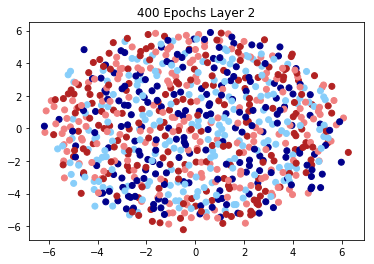

In [61]:
#mds for surrogate data

embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(surrogate_new_dataset[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =surrogate_colors_new[:800])
plt.title("400 Epochs Layer 2")
plt.show()

In [ ]:


index = 0


CCGP_ranks = np.ones((10,35))
#PS_ranks = np.ones((10,35))
for i in range(1,10):
    
    dataset = np.swapaxes(surrogates[i],0,2)
    dataset = np.reshape(surrogate_dataset,(8000,100), order = 'F')
    
    
    CCGP = []
    #PS = []

    for d in dichotomies:
        CCGP_score = ccgp(dataset, dichotomy = d, labels = surrogate_labels)          
        #pscore = p_score(dataset, dichotomy = d, labels = surrogate_labels)
        CCGP.append(CCGP_score)
        #PS.append(pscore)
        #print(pscore, d)
        print(CCGP_score)
        
    #PS.sort(reverse = True)
    #PS_ranks[index] = np.array(PS)
                      
    CCGP.sort(reverse = True)
    CCGP_ranks[index] = np.array(CCGP)
    
    index +=1
    

0.500875
0.50359375
0.504375
0.49799999999999994
0.49456249999999996
0.51390625
0.50759375
0.50025
0.5039374999999999
0.5025


In [73]:


index = 0

surrogate_datasets = []

#CCGP_ranks = np.ones((10,35))
PS_ranks = np.ones((10,35))
for i in range(2,10):
    
    dataset = np.swapaxes(surrogates[i],0,2)
    dataset = np.reshape(surrogate_dataset,(8000,100), order = 'F')
    
    
    #CCGP = []
    PS = []

    for d in dichotomies:
        #CCGP_score = ccgp(dataset, dichotomy = d, labels = surrogate_labels)          
        pscore = p_score(dataset, dichotomy = d, labels = surrogate_labels)
        #CCGP.append(CCGP_score)
        PS.append(pscore)
        print(pscore, d)
        #print(CCGP_score)
        
    PS.sort(reverse = True)
    PS_ranks[index] = np.array(PS)
                      
    #CCGP.sort(reverse = True)
    #CCGP_ranks[index] = np.array(CCGP)
    
    index +=1
    

0.06416645664504897 ([1, 2, 3, 4], [5, 6, 7, 8])
0.0589762490755452 ([1, 2, 3, 5], [4, 6, 7, 8])
0.06924962836201123 ([1, 2, 3, 6], [4, 5, 7, 8])
-0.003275198828523471 ([1, 2, 3, 7], [4, 5, 6, 8])
-0.024810177618832453 ([1, 2, 3, 8], [4, 5, 6, 7])
0.07585038699491026 ([1, 2, 4, 5], [3, 6, 7, 8])
0.05447515866579411 ([1, 2, 4, 6], [3, 5, 7, 8])
-0.042755057297394365 ([1, 2, 4, 7], [3, 5, 6, 8])
0.042214150227000924 ([1, 2, 4, 8], [3, 5, 6, 7])
0.05620476782125944 ([1, 2, 5, 6], [3, 4, 7, 8])
-0.07377507589582724 ([1, 2, 5, 7], [3, 4, 6, 8])
0.0015689436840486959 ([1, 2, 5, 8], [3, 4, 6, 7])
0.035409386354039604 ([1, 2, 6, 7], [3, 4, 5, 8])
0.03769968331987722 ([1, 2, 6, 8], [3, 4, 5, 7])
-0.06069742447913422 ([1, 2, 7, 8], [3, 4, 5, 6])
0.10697857728170117 ([1, 3, 4, 5], [2, 6, 7, 8])
0.04299578545809392 ([1, 3, 4, 6], [2, 5, 7, 8])
0.009902536668960937 ([1, 3, 4, 7], [2, 5, 6, 8])
0.07652608583876516 ([1, 3, 4, 8], [2, 5, 6, 7])
0.0718694510554877 ([1, 3, 5, 6], [2, 4, 7, 8])
-0.023808

KeyboardInterrupt: 

In [ ]:
PS_ranks = np.ones((3, 35))

PS_ranks[0] = np.array([0.18512685946908677,
 0.10758884449521101,
 0.10697809149030837,
 0.09649100509831005,
 0.09598222100309112,
 0.09157599215061223,
 0.07652613608268091,
 0.0758500260124112,
 0.07219619316507288,
 0.07186924309921033,
 0.06924938138271981,
 0.06416647896498492,
 0.058976010219655935,
 0.05620475437658692,
 0.05447531878261935,
 0.05069246065617965,
 0.04731999180233432,
 0.04299552509509165,
 0.04221343215562766,
 0.03867699687939993,
 0.0376994784457365,
 0.035409416956452236,
 0.03075627581114363,
 0.024009912421490892,
 0.020147796340056767,
 0.015848507164559135,
 0.009902262075878344,
 0.0015685816003533706,
 0.000497793769398177,
 -0.0032747606635385824,
 -0.02380867789905714,
 -0.024809972977999042,
 -0.04275541135469603,
 -0.0606973202348679,
 -0.07377515765903274])


PS_ranks[1] = np.array([0.06416645664504897 ,
0.0589762490755452, 
0.06924962836201123 ,
-0.003275198828523471 ,
-0.024810177618832453 ,
0.07585038699491026 ,
0.05447515866579411 ,
-0.042755057297394365 ,
0.042214150227000924 ,
0.05620476782125944 ,
-0.07377507589582724 ,
0.0015689436840486959 ,
0.035409386354039604, 
0.03769968331987722 ,
-0.06069742447913422 ,
0.10697857728170117 ,
0.04299578545809392 ,
0.009902536668960937 ,
0.07652608583876516 ,
0.0718694510554877 ,
-0.023808832096407745, 
0.0473202800857177 ,
0.030756522340331393, 
0.03867713613626619 ,
0.000497820726918223 ,
0.09598258034164062 ,
0.020148081867559987 ,
0.18512746434373295 ,
0.05069229549988165 ,
0.10758891177985612 ,
0.07219607149150718 ,
0.024009858645393182 ,
0.09157592838973877 ,
0.015848433619675053 ,
0.09649090481235768] )







PS_ranks[2] = np.array([0.06416604023866032, 
0.05897608266636893 ,
0.06924942602867942 ,
-0.0032745631959715162 ,
-0.024810448941573533 ,
0.07585036392078634 ,
0.05447481709872042 ,
-0.04275544693996161 ,
0.042213478129083916 ,
0.05620474789059904 ,
-0.07377515881441257 ,
0.0015687458767569967 ,
0.035409441998710905 ,
0.03769898497915431 ,
-0.060697302257395336 ,
0.1069783683855797, 
0.04299589458184186 ,
0.009902344584986388, 
0.07652599649677944, 
0.07186946014663048, 
-0.023808720014539705, 
0.047319854572728096 ,
0.030756339092171816 ,
0.03867730770032872, 
0.0004977898971704232 ,
0.09598248533204462 ,
0.020148023143207766 ,
0.18512698620471427 ,
0.050692598482073484, 
0.10758905295821834, 
0.07219601253819857, 
0.024009970352815133, 
0.09157618274723354, 
0.015848436507546138, 
0.09649101448240709] )

In [550]:
#calculate mean and SD


PS_means = np.ones(35)
CCGP_means = np.ones(35)

PS_sd = np.ones(35)
CCGP_sd = np.ones(35)

for a in range(35):
    means_data = []
    for b in range(10):
        means_data.append(PS_ranks[b][a])
        
        
    PS_means[a] = np.mean(means_data)
    PS_sd[a] = np.std(means_data)
    
    
for a in range(35):
    means_data = []
    for b in range(10):
        means_data.append(CCGP_ranks[b][a])
        
        
    CCGP_means[a] = np.mean(means_data)
    CCGP_sd[a] = np.std(means_data)
    
    


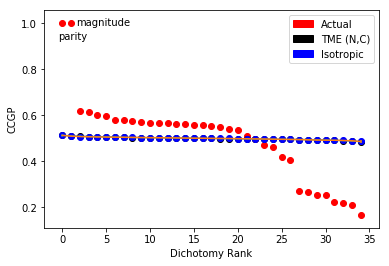

In [572]:
sample_ccgp.sort(reverse=True)

CCGP_means = np.sort(CCGP_means)
CCGP_means = CCGP_means[::-1]

plt.scatter(range(0,len(sample_ccgp)),sample_ccgp, color = "red")
plt.scatter(range(0,len(CCGP_means)),CCGP_means, color = "black")
plt.errorbar(range(0,len(CCGP_means)),CCGP_means, yerr = 2*CCGP_sd)

plt.scatter(range(0,len(random_CCGP_means)),random_CCGP_means, color = "blue")
plt.errorbar(range(0,len(random_CCGP_means)),random_CCGP_means, yerr = 2*random_CCGP_sd)



plt.ylabel("CCGP")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[1.6,0.99], s = "magnitude")
plt.annotate(xy=[-0.5,0.93], s = "parity")


red_patch = mpatches.Patch(color='red', label='Actual')
black_patch = mpatches.Patch(color='black', label='TME (N,C)')
blue_patch = mpatches.Patch(color='blue', label='Isotropic')
plt.legend(handles=[red_patch, black_patch, blue_patch])



#plt.show()
plt.savefig('/Users/anastasia/Desktop/randtensor/CCGP score.png') 

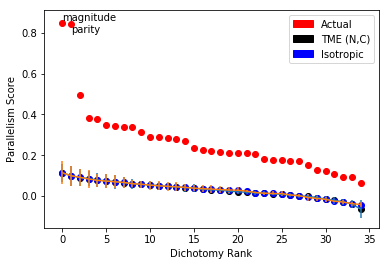

In [571]:
max_sample_PS.sort(reverse=True)

PS_means = np.sort(PS_means)
PS_means = PS_means[::-1]

plt.scatter(range(0,len(max_sample_PS)),max_sample_PS, color = "red")
plt.scatter(range(0,len(PS_means)),PS_means, color = "black")
plt.errorbar(range(0,len(PS_means)),PS_means, yerr = 2*PS_sd)

plt.scatter(range(0,len(random_PS_means)),random_PS_means, color = "blue")
plt.errorbar(range(0,len(random_PS_means)),random_PS_means, yerr = 2*random_PS_sd)

plt.ylabel("Parallelism Score")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[0,0.86], s = "magnitude")
plt.annotate(xy=[1,0.8], s = "parity")


red_patch = mpatches.Patch(color='red', label='Actual')
black_patch = mpatches.Patch(color='black', label='TME (N,C)')
blue_patch = mpatches.Patch(color='blue', label='Isotropic')
plt.legend(handles=[red_patch, black_patch, blue_patch])


#plt.show()

plt.savefig('/Users/anastasia/Desktop/randtensor/Parallelism score.png') 

In [395]:
PS_ranks[2].shape

(35, 34)

In [ ]:
#plot random_data stuff

In [559]:
random_PS_means = np.ones(35)

random_PS_sd = np.ones(35)


for b in range(35):
    sample = []
    for a in range(3):
        sample.append(PS_ranks_random[a][b])

    random_PS_means[b] = np.mean(sample)
    random_PS_sd[b] = np.std(sample)
    


In [547]:

random_CCGP_means = np.ones(35)
random_CCGP_sd = np.ones(35)

index = 0
for a in range(35):
    
    random_CCGP_means[index] = np.mean(CCGP_ranks_random[:,a])
    random_CCGP_sd[index] = np.std(CCGP_ranks_random[:,a])
    
    index+=1